In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd /content/drive/My\ Drive/Colab\ Notebooks

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import warnings
warnings.filterwarnings("ignore")


import pandas as pd
import numpy as np
from sklearn  import preprocessing, decomposition, base
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, Lasso, SGDClassifier
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, validation_curve, KFold
from sklearn.model_selection import RandomizedSearchCV, cross_validate, ParameterGrid
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,VotingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, RobustScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import roc_curve, f1_score, precision_score, recall_score, auc, mean_absolute_error, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.neighbors import KNeighborsClassifier
import statsmodels.formula.api as sm
from sklearn.svm import SVC

import xgboost as xgb
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_importance
import time

import copy 
import pickle
from IPython.display import display
from matplotlib import interactive 
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
pd.options.display.max_columns = 40

from datetime import*
import time


#from utils import *

colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd:goldenrod', 'xkcd:cadet blue', 
          'xkcd:scarlet']

""" IMPORTING MODEL
# serialize weights to HDF5
#history.save("history_base_25.h5")
from keras.models import load_model
 
# load model
model = load_model('model.h5')"""

os.chdir('./Colab_datasets/Final_versions')
os.getcwd()

'/content/drive/My Drive/Colab Notebooks/Colab_datasets/Final_versions'

In [0]:
from sklearn import datasets, linear_model
from keras import regularizers
from keras import optimizers
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import Dense, Dropout
import keras
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint

import copy
from keras.layers import *   #è incluso Flatten
from keras.models import *
from keras.layers import Concatenate, concatenate
#from keras.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

from sklearn.metrics import mean_absolute_error, mean_squared_error

from Target_enc_class import *

Using TensorFlow backend.


In [0]:
def container_modello(task):
    """Return un diz con chiavi X_train, X_test, y_train, y_test, best_estimator
    caso: 'classo', 'rollingreg', 'rollingreg' """
        
    if task== 'reg':
        X_train= container_reg['X_train']
        X_test= container_reg['X_test']
        y_train= container_reg['ytrain']
        y_test= container_reg['ytest']
        #best_est= best_reg_rf
        #feat_imp= feats_imp_rfreg
        
    return {'X_train': X_train, 'X_test': X_test, 'ytrain': y_train, 'ytest': y_test}


def title_ticks_ecc(title, xlabel, ylabel, new_fig= True , figsize= (10,6)):
    if new_fig== True:
        plt.figure(figsize=figsize)
        
    plt.title(title, color='red', fontsize= 18, pad= 13)
    plt.xlabel(xlabel, color='red', fontsize= 14)
    plt.ylabel(ylabel, color='red', fontsize= 14)
    plt.xticks(fontsize=12, color='blue')
    plt.yticks(fontsize=12, color='blue')

def summary_reg_model(classifier, x_train, y_train, y_test, predizioni):
    
    """METRICA USATA PER SCORING E' MAE"""
    #print('\n\033[1mtrain MAE is {} \033[0m'.format(round(mean_absolute_error(y_train, classifier.predict(x_train))),4))
    #print('\033[1mtest MAE TP+TN/tot is {} \033[0m'.format(round(mean_absolute_error(ytest, predictions)),4))
    
    print('\n\033[1mtrain MAE is {} \033[0m'.format(round(mean_absolute_error(y_train, classifier.predict(x_train)),4)))
    print('\033[1mtest MAE is {} \033[0m'.format(round(mean_absolute_error(y_test, predizioni),4)))
    
    print('\n\033[1mtrain RMSE is {} \033[0m'.format(round(np.sqrt(mean_squared_error(y_train, classifier.predict(x_train))),4)))
    print('\033[1mtest RMSE is {} \033[0m'.format(round(np.sqrt(mean_squared_error(y_test, predizioni)),4)))
     
def summary_reg_grid(grid_fit, scaled_train, Y_train, scaled_test, Y_test, current_minimize= 'mae'):
    """current_minimize è inutile"""
    print('best param combination: ', grid_fit.best_params_)   #'C': 0.357
    
    #print('\n\033[1mtrain MAE is {} \033[0m'.format(round(mean_absolute_error(Y_train, grid_fit.predict(scaled_train)),4)))
    #print('\033[1mtest MAE is {} \033[0m'.format(round(mean_absolute_error(Y_test, grid_fit.predict(scaled_test)),4)))
    
    idx_max_val_score= np.argmax(grid_fit.cv_results_['mean_test_score'])
    
    # Siccome MAE è molto piu lento da minimizzare, quando algoritmi vanno lenti mi conviene minimizzare MSE e 
    # calcolare MAE a mano in corrispondenza del modello migliore trovato minimizzando MSE.
    
    print('\n\033[1mTrain MAE is {} \033[0m'.format(round(-1* grid_fit.cv_results_['mean_train_score'][idx_max_val_score],4)))
    # Validation score controllato manualmente è sempre uguale a quello dato da grid.best_score_
    #print("\n\033[1m 'MANUAL' Validation MAE \033[0m is {}):".format(round(-1*max(grid_fit.cv_results_['mean_test_score']) ,4)))
    print("\033[1mValidation MAE \033[0m (best mean CV score) is \033[1m {} \033[0m".format(round(-1*grid_fit.best_score_ ,4))) #Mean cross-validated score of the best_estimator
    
    #elif current_minimize == 'mse':
        #print('..Calculating MAE by hand for the best model on the whole Train and Test set..')
        #print('\n\033[1mTrain MAE is {} \033[0m'.format(round(mean_absolute_error(Y_train, grid_fit.predict(scaled_train)),4)))
    
    print('\033[1mTest MAE is {} \033[0m'.format(round(mean_absolute_error(Y_test, grid_fit.predict(scaled_test)),4)))
    
    print('\n\033[1mtrain RMSE is {} \033[0m'.format(round(np.sqrt(mean_squared_error(Y_train, grid_fit.predict(scaled_train))),4)))
    print('\033[1mtest RMSE is {} \033[0m'.format(round(np.sqrt(mean_squared_error(Y_test, grid_fit.predict(scaled_test))),4)))

# <center> Preprocessing

**<center> Imports**

In [0]:
REMOVE_N_ORDERS= False
REMOVE_SEASONALITIES= True
    
with open('./final_reg_10sn.pickle', 'rb') as cont_reg:
    container_reg= cont_reg= pickle.load(cont_reg)
    
containers= [cont_reg]         
            
trimesters_cols= [col for col in cont_reg['X_train'].columns if col.startswith('orders_trim')]+ ['initial_trimester']
#print(trimesters_cols)
if REMOVE_SEASONALITIES:
    for cont in containers:
        for X in ['X_train', 'X_test']:
            cont[X].drop(trimesters_cols, axis=1, inplace=True)
       
    
X_train_reg= cont_reg['X_train']
X_test_reg= cont_reg['X_test']    


#(34379, 13) (6068, 13) (28732, 17) (5032, 17)
print('Shapes Static and Rolling25', X_train_reg.shape, X_test_reg.shape) 

Shapes Static and Rolling25 (76326, 27) (13270, 27)


In [0]:
ytrain= cont_reg['ytrain']
ytest= cont_reg['ytest']

ytest.head()

80    70.41
81    70.41
82    70.41
83    70.41
84    70.41
Name: Target%, dtype: float64

<b> Cardinality of Categorical Variables

In [0]:
feats_binarie= ['Variant code', 'Contract Type', 'Main material group qualification flag', 'Professional services flag']

new_feats= ['num_orders', '%avg_importo', '%std_importo', '%avg_intervals', '%std_intervals', 'life%', '%days_from_last_order', '%days_til_first_order', 'True/Ideal Slope', 
             'ordini/mese']
feats_create= new_feats
encoded_cols= [col for col in container_reg['X_train'].columns if col.endswith('ENC') ] 

for col in container_reg['X_train'][encoded_cols]:
    print('Redoundancy {}-->  {}'.format(col, container_reg['X_train'][col].value_counts().sort_values(ascending= False).iloc[0]))

print('\nIn test set no Noise, perciò redoundancy più alta\n')
for col in container_reg['X_test'][encoded_cols]:
    print('Redoundancy {}-->  {}'.format(col, container_reg['X_test'][col].value_counts().sort_values(ascending= False).iloc[0]))

Redoundancy VMD Code_FINAL_ENC-->  7
Redoundancy QMG Code_FINAL_ENC-->  4
Redoundancy Purchase Unit Code_FINAL_ENC-->  5
Redoundancy Global Business line_FINAL_ENC-->  6
Redoundancy Geographical Area_FINAL_ENC-->  9
Redoundancy Supplier Type Code_FINAL_ENC-->  10
Redoundancy Purchase document type_FINAL_ENC-->  7
Redoundancy Job type_FINAL_ENC-->  8

In test set no Noise, perciò redoundancy più alta

Redoundancy VMD Code_FINAL_ENC-->  4111
Redoundancy QMG Code_FINAL_ENC-->  593
Redoundancy Purchase Unit Code_FINAL_ENC-->  1284
Redoundancy Global Business line_FINAL_ENC-->  3881
Redoundancy Geographical Area_FINAL_ENC-->  8430
Redoundancy Supplier Type Code_FINAL_ENC-->  12138
Redoundancy Purchase document type_FINAL_ENC-->  5804
Redoundancy Job type_FINAL_ENC-->  8043


In [0]:
#for X in ['X_train', 'X_test']:
  #container_reg[X].drop('supplier_class', axis=1, inplace= True, errors='ignore')

container_reg['X_train'].head(2)

,Variant code,Contract Type,Header amount,Main material group qualification flag,Professional services flag,num_orders,%avg_importo,%std_importo,%avg_intervals,%std_intervals,life%,%days_til_first_order,durata_nominale_gg,percentage_used,ordini/mese,True/Ideal Slope,Accel_orders,Accel_%used,%days_from_last_order,VMD Code_FINAL_ENC,QMG Code_FINAL_ENC,Purchase Unit Code_FINAL_ENC,Global Business line_FINAL_ENC,Geographical Area_FINAL_ENC,Supplier Type Code_FINAL_ENC,Purchase document type_FINAL_ENC,Job type_FINAL_ENC
Purchase document,,,,,,,,,,,,,,,,,,,,,,,,,,,
DI\8400060305,0.0,0.0,28.82395,-1.0,0.0,-0.2,-0.057640,0.000000,-0.389683,0.000000,-0.75,-0.517864,1.851324,-0.155730,-0.121951,-0.355348,0.0,0.00000,-0.065705,0.379424,-0.088194,-0.224535,-1.174987,-1.207811,0.206781,0.574127,-0.865944
DI\8400060305,0.0,0.0,28.82395,-1.0,0.0,308.4,-0.057091,0.005461,-0.393375,0.031061,-0.50,-0.363977,1.851324,-0.012152,434.121951,0.366317,1.0,1.01833,0.000000,-0.301717,-0.202577,0.099109,-0.709181,-1.289694,-0.116032,0.626941,-1.016228


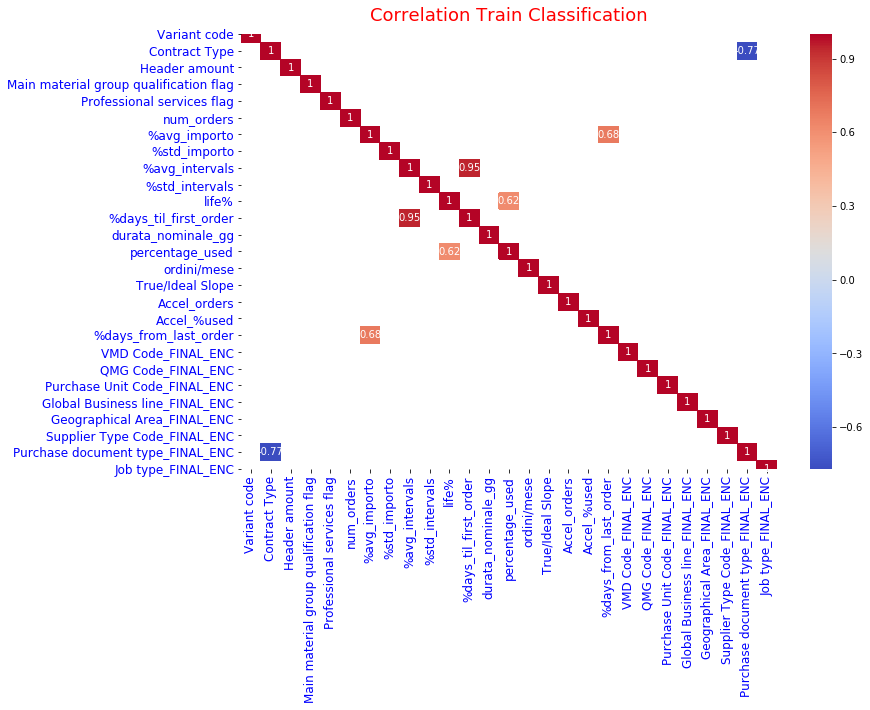

In [0]:
soglia = 0.6

title_ticks_ecc('Correlation Train Classification', '', '', figsize=(12, 8))
sns.heatmap(container_reg['X_train'].corr()[abs(container_reg['X_train'].corr())> soglia ], cmap= 'coolwarm', annot= True,)

In [0]:
container_reg['X_train'].shape, container_reg['X_test'].shape   # (232298, 25), (41158, 25)

((76326, 27), (13270, 27))

In [0]:
def MAPE(y_true, y_pred):   #
    """mean_absolute_percentage_error. Nel mio caso non ha senso, sono gia tutte percentuali. Se divido per y_true, 
    #ho quasi divisione per 0 a volte...perciò meglio MAE, che essendo su valori % funge praticamente da MAPE"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    #return np.mean(np.abs((y_true - y_pred) / y_true))  * 100
    return np.mean(np.abs((y_true - y_pred)/ y_true)) *100

In [0]:
def summary_reg_model(x_train, y_train, y_test, predizioni, preds_train):
    
    """METRICA USATA PER SCORING E' MAE"""
    diz={}
    diz['Train MAE']= round(mean_absolute_error(y_train, preds_train),3)
    diz['Test MAE'] =  round(mean_absolute_error(y_test, predizioni),3)
    diz['Train RMSE']= round(np.sqrt(mean_squared_error(y_train, preds_train)),3)
    diz['Test RMSE']=  round(np.sqrt(mean_squared_error(y_test, predizioni)),3)

    #diz['Train MAPE']= round(MAPE(y_train, preds_train),3)
    #diz['Test MAPE'] =  round(MAPE(y_test, predizioni),3)
    
    print('\n\033[1mtrain MAE is {} \033[0m'.format(diz['Train MAE']))
    print('\033[1mtest MAE is {} \033[0m'.format(diz['Test MAE']))
    
    print('\n\033[1mtrain RMSE is {} \033[0m'.format(diz['Train RMSE']))
    print('\033[1mtest RMSE is {} \033[0m'.format(diz['Test RMSE']))

    #print('\n\033[1mtrain MAPE is {} \033[0m'.format(diz['Train MAPE']))
    #print('\033[1mtest MAPE is {} \033[0m'.format(diz['Test MAPE']))

    return diz

In [0]:
def plot_model_history(model_history, metric= 'mae'):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history[metric])+1),model_history.history[metric])
    axs[0].plot(range(1,len(model_history.history['val_' + metric])+1),model_history.history['val_' + metric])
    axs[0].set_title('Model ' + metric.upper())
    axs[0].set_ylabel(metric.upper())
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history[metric])+1),len(model_history.history['val_' + metric])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def df_cv_results(grid_fit, n_to_show= 5):
    df= pd.DataFrame(grid_fit.cv_results_)
    df= df[[col for col in df.columns if 'param_' in col]+['mean_test_score', 'mean_train_score']]
    return df.sort_values(by= 'mean_test_score', ascending= False).head(n_to_show)

In [0]:
def run_model(estimator, task='reg', param_grid= None, random= False, verbose=5, cv=3, n_jobs= None, comparison= False,
              return_single_mod= True, return_results=True, n_to_show=5, early= None, plot_metric= 'mean_squared_error', epochs= 1, batch_size= 2048): 
    """estimator è il modello, task puo essere: ['reg', 'reg']. \n
    Return Grid Search estimator. """
    
    diz= container_modello(task)
    
    X_train= diz['X_train']
    X_test= diz['X_test']
    ytrain= diz['ytrain']
    ytest= diz['ytest']
    
    print('Shape di X_train e X_test sono: ', X_train.shape, X_test.shape)
    print('Shape di y_train e y_test sono: ', ytrain.shape, ytest.shape)
    temp=time.time()
    
    if param_grid is None:
        history= estimator.fit(X_train, ytrain, validation_split= 0.2, callbacks= [early], epochs= epochs, batch_size= batch_size)

        plot_model_history(history, metric= plot_metric )
        preds= estimator.predict(X_test)
        preds_train= estimator.predict(X_train)
        diz_summary= summary_reg_model(X_train, ytrain, ytest, preds, preds_train)
        print('execution time (min)=', round((time.time()-temp)/60, 1), ' finished at ', datetime.today())
        if return_single_mod==True:
            return [history, diz_summary]
 
    else:
      if random== False:
        print('\n It is not a single model but a Grid Search \n')
        Grid_RF = GridSearchCV(estimator, param_grid, scoring='neg_mean_absolute_error', cv=cv, return_train_score=True, 
                                n_jobs= n_jobs, verbose= verbose)
      else:
        print('\n It is not a single model but a (Randomized) Grid Search \n')
        Grid_RF = RandomizedSearchCV(estimator, param_distributions=param_grid, 
                                      scoring='neg_mean_absolute_error', cv=cv, return_train_score=True, verbose= verbose, n_jobs= n_jobs)

      ################ Faccio il FIT ##################
      if early is None:
        Grid_RF.fit(X_train, ytrain)
      else:
        Grid_RF.fit(X_train, ytrain, callbacks= [early])
      
      ##################### statistiche ##################
        
      summary_reg_grid(Grid_RF, X_train, ytrain, X_test, ytest)  
      print('execution time (min)=', round((time.time()-temp)/60, 1), ' finished at ', datetime.today())
      if return_results==True:
        print('best_results')
        print(df_cv_results(Grid_RF, n_to_show))
        
      return  Grid_RF 

run_reg_model= run_model

In [0]:
def NN(nodi_hiddens= [64,32,16,8], with_dropout=True , dropout= 0.5, lr= 0.00001, n_layers= 1,
                loss_func= 'mean_squared_error', metrics= ['mse', 'mae', 'mape']): 

  #diz_pre_model= create_embedded_inputs(X_train, X_test, max_emb_size=50, method= 'half')
  model = Sequential()
  for i in range (n_layers):
    if i==0:
      model.add(Dense(nodi_hiddens[0], input_dim=len(container_reg['X_train'].columns), activation='relu'))
      if with_dropout== True:
        model.add(Dropout(rate= dropout))
    else:
      model.add(Dense(nodi_hiddens[i], activation='relu'))
      if with_dropout==True:
        model.add(Dropout(rate= dropout))

  model.add(Dense(1))
  model.compile(loss= loss_func, optimizer= optimizers.Adam(lr= lr, ), metrics= metrics)  #fbeta_score(y_true, y_pred, beta=1)

  return model

## Iterative Grid Search to investigate best parameters

In [0]:
#@title
early = EarlyStopping(monitor='mean_absolute_error', mode='min', verbose=3, patience=5, min_delta= 0.5/100)  # Voglio 0.1% di miglioramento in 7 iterazioni
nn_base_one = KerasRegressor(build_fn=NN, epochs=10, batch_size=256, verbose=2)

param_grid = dict(nodi_hiddens= [[64,32,16,8], [128,64,32,16] ], 
        n_layers= [1, 2],
        epochs= [3],
        batch_size= [32, 256],
        dropout= [0.5] ,
        lr= [1e-04, 1e-07])  #5% di prob di droppare un link

history_one= run_model(nn_base_one,  param_grid= param_grid, early= early, cv=2)

In [0]:
df_cv_results(history_one, 15)

,param_batch_size,param_dropout,param_epochs,param_lr,param_n_layers,param_nodi_hiddens,mean_test_score,mean_train_score
1,32,0.5,200,0.0001,1,"[128, 64, 32, 16]",-13.883479,-13.636420
3,32,0.5,200,0.0001,2,"[128, 64, 32, 16]",-13.914354,-13.626266
2,32,0.5,200,0.0001,2,"[64, 32, 16, 8]",-14.352725,-14.223290
0,32,0.5,200,0.0001,1,"[64, 32, 16, 8]",-14.364368,-14.182157
9,256,0.5,200,0.0001,1,"[128, 64, 32, 16]",-14.379329,-14.087826
11,256,0.5,200,0.0001,2,"[128, 64, 32, 16]",-14.622639,-14.371102
8,256,0.5,200,0.0001,1,"[64, 32, 16, 8]",-14.905504,-14.611786
10,256,0.5,200,0.0001,2,"[64, 32, 16, 8]",-16.008685,-15.770036
7,32,0.5,200,1e-07,2,"[128, 64, 32, 16]",-75.197467,-75.146079
5,32,0.5,200,1e-07,1,"[128, 64, 32, 16]",-75.909448,-75.949711


In [0]:
#best param combination:  {'batch_size': 32, 'dropout': 0.5, 'epochs': 200, 'lr': 0.0001, 'n_layers': 1, 'nodi_hiddens': [128, 64, 32, 16]}


	 ITERAZIONE 1/12

 n_layers: 1, batch_size: 64, dropout: 0.5, lr: 0.001 
 nodi_hidden1 : 64 
Shape di X_train e X_test sono:  (76326, 27) (13270, 27)
Shape di y_train e y_test sono:  (76326,) (13270,)
Train on 61060 samples, validate on 15266 samples
Epoch 1/150
61060/61060 [==============================] - 2s 36us/step - loss: 3011.0065 - mean_absolute_error: 45.5666 - mean_absolute_percentage_error: 73.6285 - val_loss: 2402.6259 - val_mean_absolute_error: 33.7256 - val_mean_absolute_percentage_error: 70.1887
Epoch 2/150
61060/61060 [==============================] - 2s 28us/step - loss: 1358.6983 - mean_absolute_error: 28.1483 - mean_absolute_percentage_error: 77.4906 - val_loss: 1992.6024 - val_mean_absolute_error: 31.1727 - val_mean_absolute_percentage_error: 111.5468
Epoch 3/150
61060/61060 [==============================] - 2s 28us/step - loss: 1053.0043 - mean_absolute_error: 25.2271 - mean_absolute_percentage_error: 94.0153 - val_loss: 1636.5278 - val_mean_absolute_error: 29

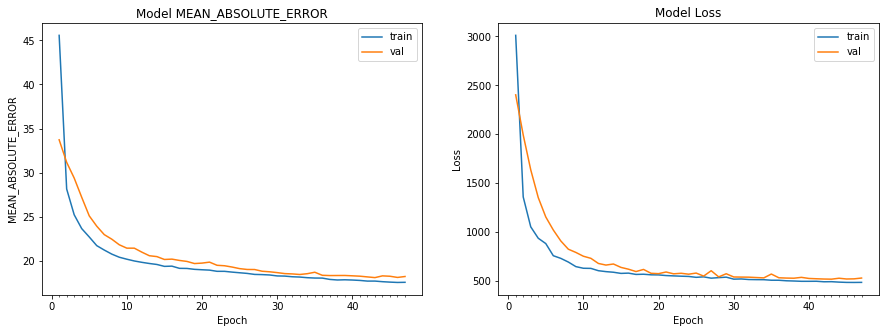


train MAE is 15.852 
test MAE is 16.191 

train RMSE is 20.324 
test RMSE is 20.554 
execution time (min)= 1.3  finished at  2019-11-28 14:35:31.609971

	 ITERAZIONE 2/12

 n_layers: 1, batch_size: 64, dropout: 0.5, lr: 0.001 
 nodi_hidden1 : 128 
Shape di X_train e X_test sono:  (76326, 27) (13270, 27)
Shape di y_train e y_test sono:  (76326,) (13270,)
Train on 61060 samples, validate on 15266 samples
Epoch 1/150
61060/61060 [==============================] - 2s 35us/step - loss: 2619.9988 - mean_absolute_error: 41.1899 - mean_absolute_percentage_error: 75.3236 - val_loss: 1996.0704 - val_mean_absolute_error: 32.5952 - val_mean_absolute_percentage_error: 75.8564
Epoch 2/150
61060/61060 [==============================] - 2s 28us/step - loss: 1087.8348 - mean_absolute_error: 24.6038 - mean_absolute_percentage_error: 85.6849 - val_loss: 1547.8976 - val_mean_absolute_error: 29.4141 - val_mean_absolute_percentage_error: 139.0064
Epoch 3/150
61060/61060 [==============================] - 2

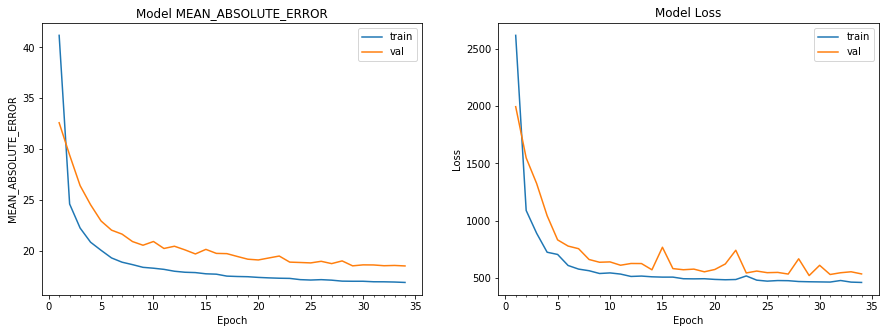


train MAE is 15.625 
test MAE is 15.999 

train RMSE is 20.189 
test RMSE is 20.513 
execution time (min)= 1.0  finished at  2019-11-28 14:36:33.526087

	 ITERAZIONE 3/12

 n_layers: 2, batch_size: 64, dropout: 0.5, lr: 0.001 
 nodi_hidden1 : 64 
 nodi_hidden2 : 32 
Shape di X_train e X_test sono:  (76326, 27) (13270, 27)
Shape di y_train e y_test sono:  (76326,) (13270,)
Train on 61060 samples, validate on 15266 samples
Epoch 1/150
61060/61060 [==============================] - 3s 43us/step - loss: 2884.2935 - mean_absolute_error: 40.5314 - mean_absolute_percentage_error: 85.9934 - val_loss: 2458.5916 - val_mean_absolute_error: 31.2219 - val_mean_absolute_percentage_error: 146.3015
Epoch 2/150
61060/61060 [==============================] - 2s 28us/step - loss: 1290.2033 - mean_absolute_error: 28.2818 - mean_absolute_percentage_error: 102.3779 - val_loss: 1551.6114 - val_mean_absolute_error: 28.3318 - val_mean_absolute_percentage_error: 197.9086
Epoch 3/150
61060/61060 [==============

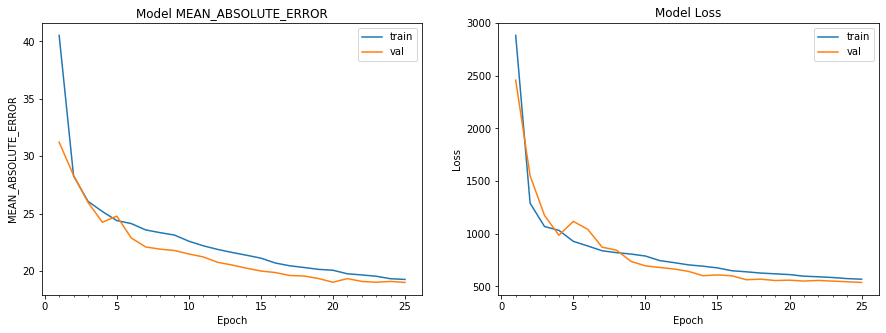


train MAE is 16.296 
test MAE is 16.674 

train RMSE is 20.535 
test RMSE is 20.821 
execution time (min)= 0.8  finished at  2019-11-28 14:37:19.343732

	 ITERAZIONE 4/12

 n_layers: 2, batch_size: 64, dropout: 0.5, lr: 0.001 
 nodi_hidden1 : 128 
 nodi_hidden2 : 64 
Shape di X_train e X_test sono:  (76326, 27) (13270, 27)
Shape di y_train e y_test sono:  (76326,) (13270,)
Train on 61060 samples, validate on 15266 samples
Epoch 1/150
61060/61060 [==============================] - 3s 48us/step - loss: 2148.7475 - mean_absolute_error: 34.0871 - mean_absolute_percentage_error: 89.3544 - val_loss: 2634.9095 - val_mean_absolute_error: 30.4552 - val_mean_absolute_percentage_error: 196.6572
Epoch 2/150
61060/61060 [==============================] - 2s 32us/step - loss: 1005.3488 - mean_absolute_error: 24.6111 - mean_absolute_percentage_error: 109.0423 - val_loss: 1499.8244 - val_mean_absolute_error: 26.2476 - val_mean_absolute_percentage_error: 236.0414
Epoch 3/150
61060/61060 [=============

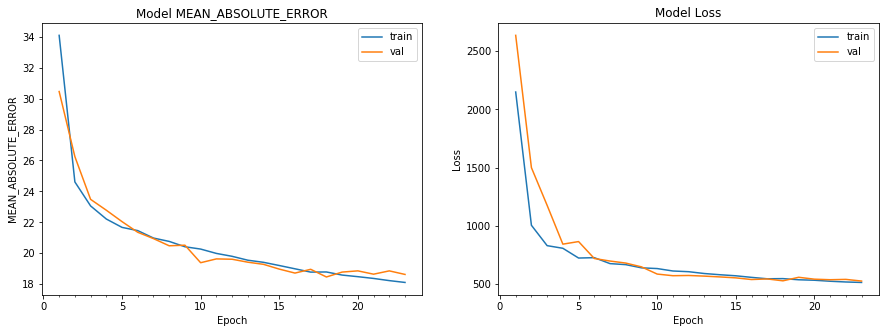


train MAE is 15.728 
test MAE is 16.092 

train RMSE is 20.148 
test RMSE is 20.439 
execution time (min)= 0.8  finished at  2019-11-28 14:38:08.002509

	 ITERAZIONE 5/12

 n_layers: 3, batch_size: 64, dropout: 0.5, lr: 0.001 
 nodi_hidden1 : 64 
 nodi_hidden2 : 32 
 nodi_hidden3 : 16 
Shape di X_train e X_test sono:  (76326, 27) (13270, 27)
Shape di y_train e y_test sono:  (76326,) (13270,)
Train on 61060 samples, validate on 15266 samples
Epoch 1/150
61060/61060 [==============================] - 3s 52us/step - loss: 3416.8515 - mean_absolute_error: 43.9354 - mean_absolute_percentage_error: 95.9907 - val_loss: 2090.9263 - val_mean_absolute_error: 32.8462 - val_mean_absolute_percentage_error: 163.0607
Epoch 2/150
61060/61060 [==============================] - 2s 32us/step - loss: 1869.0948 - mean_absolute_error: 33.9188 - mean_absolute_percentage_error: 107.6603 - val_loss: 1439.5532 - val_mean_absolute_error: 29.8774 - val_mean_absolute_percentage_error: 191.9627
Epoch 3/150
61060/6

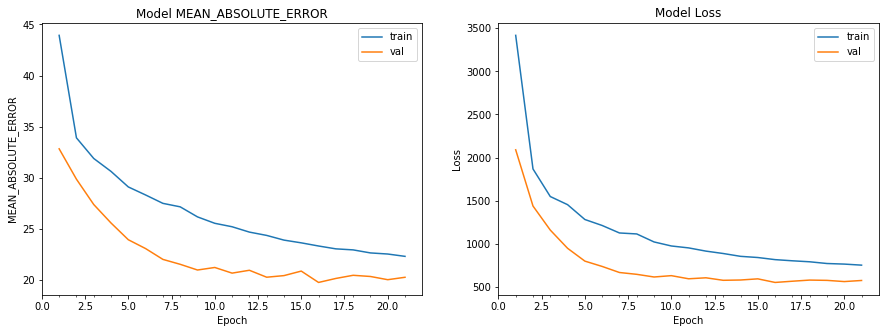


train MAE is 17.485 
test MAE is 17.727 

train RMSE is 21.23 
test RMSE is 21.467 
execution time (min)= 0.7  finished at  2019-11-28 14:38:51.569072

	 ITERAZIONE 6/12

 n_layers: 3, batch_size: 64, dropout: 0.5, lr: 0.001 
 nodi_hidden1 : 128 
 nodi_hidden2 : 64 
 nodi_hidden3 : 32 
Shape di X_train e X_test sono:  (76326, 27) (13270, 27)
Shape di y_train e y_test sono:  (76326,) (13270,)
Train on 61060 samples, validate on 15266 samples
Epoch 1/150
61060/61060 [==============================] - 3s 54us/step - loss: 3431.0513 - mean_absolute_error: 37.4504 - mean_absolute_percentage_error: 105.5172 - val_loss: 2156.5641 - val_mean_absolute_error: 29.0812 - val_mean_absolute_percentage_error: 197.2237
Epoch 2/150
61060/61060 [==============================] - 2s 35us/step - loss: 1389.7923 - mean_absolute_error: 28.8755 - mean_absolute_percentage_error: 109.3782 - val_loss: 1365.3315 - val_mean_absolute_error: 26.4636 - val_mean_absolute_percentage_error: 213.6753
Epoch 3/150
61060/

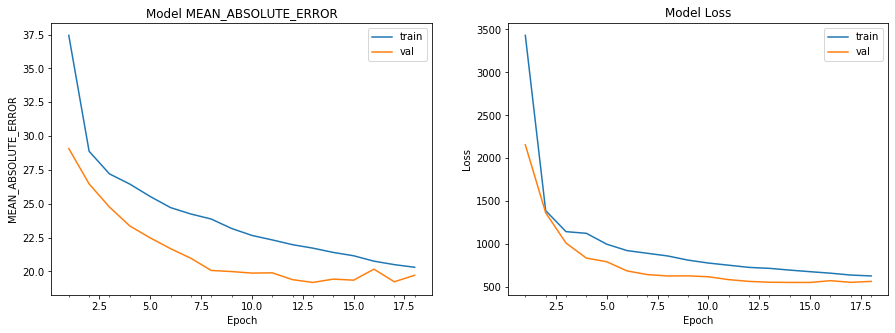


train MAE is 16.471 
test MAE is 16.815 

train RMSE is 20.619 
test RMSE is 20.91 
execution time (min)= 0.7  finished at  2019-11-28 14:39:36.044449

	 ITERAZIONE 7/12

 n_layers: 1, batch_size: 128, dropout: 0.5, lr: 0.001 
 nodi_hidden1 : 64 
Shape di X_train e X_test sono:  (76326, 27) (13270, 27)
Shape di y_train e y_test sono:  (76326,) (13270,)
Train on 61060 samples, validate on 15266 samples
Epoch 1/150
61060/61060 [==============================] - 2s 35us/step - loss: 3772.7369 - mean_absolute_error: 53.3870 - mean_absolute_percentage_error: 80.2705 - val_loss: 2762.7245 - val_mean_absolute_error: 37.9111 - val_mean_absolute_percentage_error: 68.4257
Epoch 2/150
61060/61060 [==============================] - 1s 14us/step - loss: 1790.0736 - mean_absolute_error: 32.3264 - mean_absolute_percentage_error: 64.6108 - val_loss: 2222.2902 - val_mean_absolute_error: 33.4784 - val_mean_absolute_percentage_error: 73.5436
Epoch 3/150
61060/61060 [==============================] - 1s 

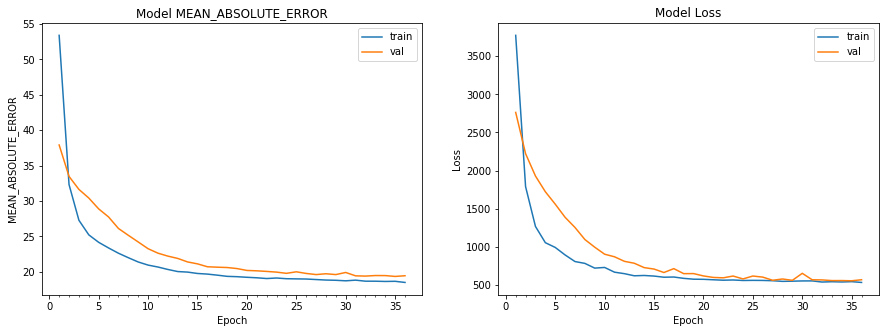


train MAE is 16.496 
test MAE is 16.861 

train RMSE is 20.899 
test RMSE is 21.208 
execution time (min)= 0.6  finished at  2019-11-28 14:40:12.834433

	 ITERAZIONE 8/12

 n_layers: 1, batch_size: 128, dropout: 0.5, lr: 0.001 
 nodi_hidden1 : 128 
Shape di X_train e X_test sono:  (76326, 27) (13270, 27)
Shape di y_train e y_test sono:  (76326,) (13270,)
Train on 61060 samples, validate on 15266 samples
Epoch 1/150
61060/61060 [==============================] - 2s 38us/step - loss: 3349.4455 - mean_absolute_error: 49.1450 - mean_absolute_percentage_error: 78.2993 - val_loss: 2292.3292 - val_mean_absolute_error: 35.2556 - val_mean_absolute_percentage_error: 66.3038
Epoch 2/150
61060/61060 [==============================] - 1s 21us/step - loss: 1312.1419 - mean_absolute_error: 28.0054 - mean_absolute_percentage_error: 69.2479 - val_loss: 1900.3151 - val_mean_absolute_error: 31.0021 - val_mean_absolute_percentage_error: 109.7187
Epoch 3/150
61060/61060 [==============================] - 

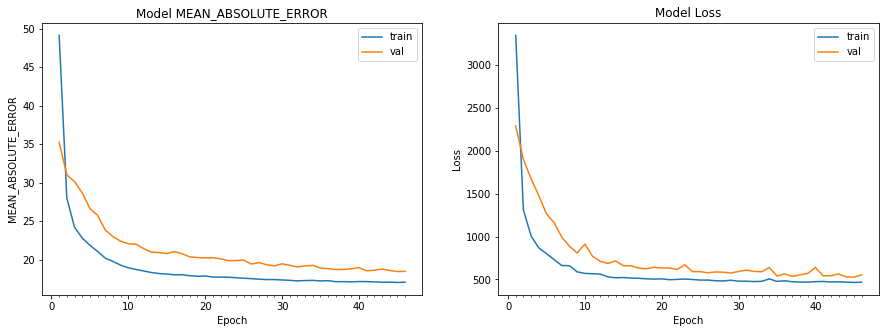


train MAE is 15.762 
test MAE is 16.067 

train RMSE is 20.553 
test RMSE is 20.687 
execution time (min)= 0.9  finished at  2019-11-28 14:41:09.792009

	 ITERAZIONE 9/12

 n_layers: 2, batch_size: 128, dropout: 0.5, lr: 0.001 
 nodi_hidden1 : 64 
 nodi_hidden2 : 32 
Shape di X_train e X_test sono:  (76326, 27) (13270, 27)
Shape di y_train e y_test sono:  (76326,) (13270,)
Train on 61060 samples, validate on 15266 samples
Epoch 1/150
61060/61060 [==============================] - 2s 37us/step - loss: 3624.0771 - mean_absolute_error: 48.0889 - mean_absolute_percentage_error: 91.2938 - val_loss: 3641.9984 - val_mean_absolute_error: 33.1213 - val_mean_absolute_percentage_error: 107.6869
Epoch 2/150
61060/61060 [==============================] - 1s 17us/step - loss: 1557.7428 - mean_absolute_error: 30.8675 - mean_absolute_percentage_error: 91.6496 - val_loss: 2181.0964 - val_mean_absolute_error: 30.8149 - val_mean_absolute_percentage_error: 165.4095
Epoch 3/150
61060/61060 [==============

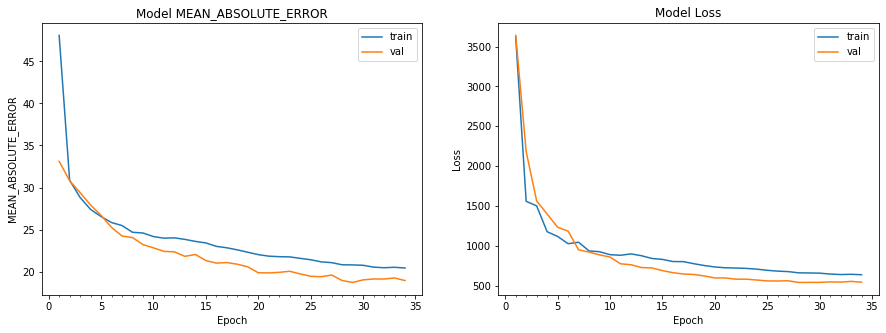


train MAE is 16.566 
test MAE is 16.914 

train RMSE is 20.732 
test RMSE is 21.041 
execution time (min)= 0.7  finished at  2019-11-28 14:41:50.369703

	 ITERAZIONE 10/12

 n_layers: 2, batch_size: 128, dropout: 0.5, lr: 0.001 
 nodi_hidden1 : 128 
 nodi_hidden2 : 64 
Shape di X_train e X_test sono:  (76326, 27) (13270, 27)
Shape di y_train e y_test sono:  (76326,) (13270,)
Train on 61060 samples, validate on 15266 samples
Epoch 1/150
61060/61060 [==============================] - 3s 46us/step - loss: 2842.8278 - mean_absolute_error: 41.1950 - mean_absolute_percentage_error: 85.4507 - val_loss: 3726.3600 - val_mean_absolute_error: 31.2504 - val_mean_absolute_percentage_error: 164.7167
Epoch 2/150
61060/61060 [==============================] - 1s 22us/step - loss: 1274.4844 - mean_absolute_error: 26.0337 - mean_absolute_percentage_error: 98.6744 - val_loss: 1984.9976 - val_mean_absolute_error: 29.9510 - val_mean_absolute_percentage_error: 221.5968
Epoch 3/150
61060/61060 [============

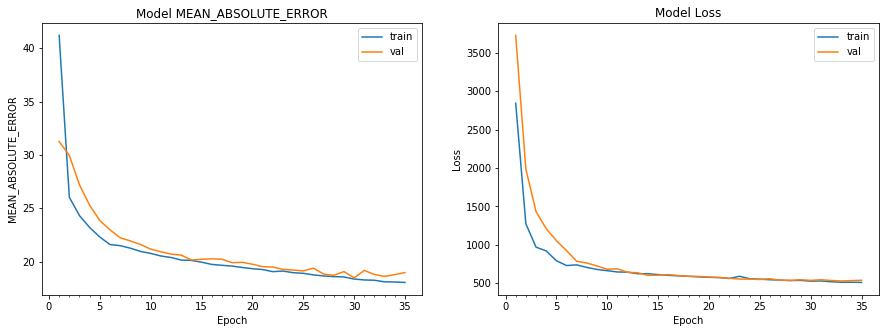


train MAE is 15.901 
test MAE is 16.287 

train RMSE is 20.252 
test RMSE is 20.545 
execution time (min)= 0.9  finished at  2019-11-28 14:42:43.308214

	 ITERAZIONE 11/12

 n_layers: 3, batch_size: 128, dropout: 0.5, lr: 0.001 
 nodi_hidden1 : 64 
 nodi_hidden2 : 32 
 nodi_hidden3 : 16 
Shape di X_train e X_test sono:  (76326, 27) (13270, 27)
Shape di y_train e y_test sono:  (76326,) (13270,)
Train on 61060 samples, validate on 15266 samples
Epoch 1/150
61060/61060 [==============================] - 3s 51us/step - loss: 3898.5107 - mean_absolute_error: 48.6873 - mean_absolute_percentage_error: 91.0716 - val_loss: 2569.6501 - val_mean_absolute_error: 33.3804 - val_mean_absolute_percentage_error: 199.5408
Epoch 2/150
61060/61060 [==============================] - 1s 18us/step - loss: 2543.9993 - mean_absolute_error: 36.0812 - mean_absolute_percentage_error: 108.7196 - val_loss: 1907.6706 - val_mean_absolute_error: 31.4832 - val_mean_absolute_percentage_error: 220.7076
Epoch 3/150
61060

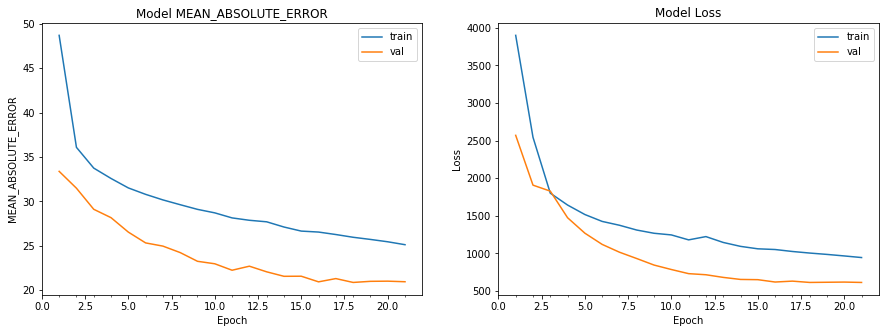


train MAE is 18.762 
test MAE is 18.974 

train RMSE is 22.384 
test RMSE is 22.59 
execution time (min)= 0.5  finished at  2019-11-28 14:43:12.370203

	 ITERAZIONE 12/12

 n_layers: 3, batch_size: 128, dropout: 0.5, lr: 0.001 
 nodi_hidden1 : 128 
 nodi_hidden2 : 64 
 nodi_hidden3 : 32 
Shape di X_train e X_test sono:  (76326, 27) (13270, 27)
Shape di y_train e y_test sono:  (76326,) (13270,)
Train on 61060 samples, validate on 15266 samples
Epoch 1/150
61060/61060 [==============================] - 3s 50us/step - loss: 2943.9717 - mean_absolute_error: 41.9994 - mean_absolute_percentage_error: 90.9963 - val_loss: 2358.9993 - val_mean_absolute_error: 31.7972 - val_mean_absolute_percentage_error: 180.7657
Epoch 2/150
61060/61060 [==============================] - 2s 25us/step - loss: 1664.5147 - mean_absolute_error: 30.6481 - mean_absolute_percentage_error: 104.6387 - val_loss: 1342.9119 - val_mean_absolute_error: 28.7416 - val_mean_absolute_percentage_error: 217.2655
Epoch 3/150
61060

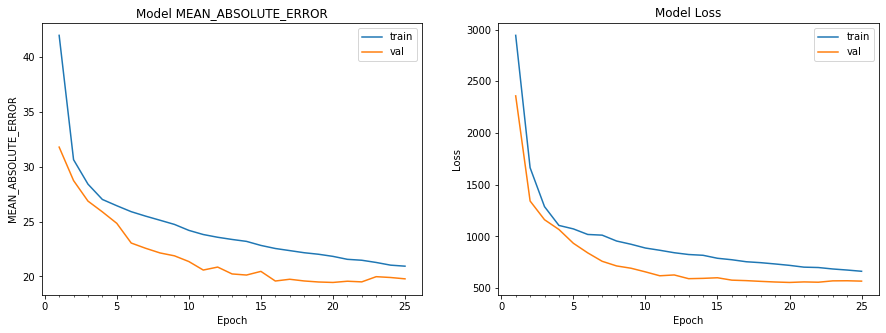


train MAE is 16.492 
test MAE is 16.843 

train RMSE is 20.651 
test RMSE is 20.938 
execution time (min)= 0.7  finished at  2019-11-28 14:43:54.694367


In [0]:
early = EarlyStopping(monitor='val_mean_absolute_error', mode='min', verbose=4, patience=5, min_delta= 0.1)  #min delta metterlo non in %, metti 1

#nn_base_one = KerasClassifier(build_fn=NN, epochs=10, batch_size=256, verbose=2)

param_grid = dict(
        n_layers= [1, 2, 3],
        nodi_hiddens= [[64,32,16,8], [128,64,32,16]],
        epochs= [150], 
        batch_size= [64, 128],
        dropout= [0.5] ,
        lr= [1e-03])  #5% di prob di droppare un link


l=[]
iteration=1

for diz in list(ParameterGrid(param_grid)):
  print('\n\t ITERAZIONE {}/{}'.format(iteration, len(list(ParameterGrid(param_grid)))))
  n_layers= diz['n_layers']
  nodi_hiddens= diz['nodi_hiddens']
  batch_size= diz['batch_size']
  dropout= diz['dropout']
  epochs= diz['epochs']
  lr= diz['lr']
  print('\n\033[1m n_layers: {}, batch_size: {}, dropout: {}, lr: {} \033[0m'.format(n_layers, batch_size, dropout, lr))
  for i in range(n_layers):
      print('\033[1m nodi_hidden{} : {} \033[0m'.format(str(i+1), str(nodi_hiddens[i]) ))
  
  nn = NN(nodi_hiddens= nodi_hiddens, dropout= dropout, lr= lr, n_layers= n_layers, metrics= ['mae', 'mape'])
  history_one= run_model(nn, early= early, epochs= epochs, batch_size= batch_size, plot_metric= 'mean_absolute_error')

  l.append(history_one)
  iteration+=1

In [0]:
l[0][1]['Test MAE']

16.191

In [0]:
def results_hand_grid( lista_histories= l, param_grid= param_grid, columns= ['batch_size', 'dropout', 'Train Accuracy', 'Test Accuracy', 'Train F1', 'Test F1']):

  iteraz=0
  
  results_emb_1h= pd.DataFrame(columns= columns )

  for diz in list(ParameterGrid(param_grid)):
    res= lista_histories[iteraz][1]

    df= pd.DataFrame([
    diz['n_layers'], diz['nodi_hiddens'],
    diz['batch_size'],
    diz['dropout'],
    diz['lr'],
    res['Train MAE'],
    res['Test MAE'],
    res['Train RMSE'],
    res['Test RMSE']   ,]).T

    df.columns= columns
    
    #print(df)
    results_emb_1h= results_emb_1h.append(df, ignore_index=True)

    iteraz+=1
  return results_emb_1h.sort_values(by= 'Test MAE', ascending= True)

In [0]:
columns= ['n_layers', 'nodi_hiddens','batch_size', 'dropout', 'lr','Train MAE', 'Test MAE', 'Train RMSE', 'Test RMSE']
results_hand_grid( lista_histories= l, param_grid= param_grid, columns= columns)

,n_layers,nodi_hiddens,batch_size,dropout,lr,Train MAE,Test MAE,Train RMSE,Test RMSE
1,1,"[128, 64, 32, 16]",64,0.5,0.001,15.625,15.999,20.189,20.513
7,1,"[128, 64, 32, 16]",128,0.5,0.001,15.762,16.067,20.553,20.687
3,2,"[128, 64, 32, 16]",64,0.5,0.001,15.728,16.092,20.148,20.439
0,1,"[64, 32, 16, 8]",64,0.5,0.001,15.852,16.191,20.324,20.554
9,2,"[128, 64, 32, 16]",128,0.5,0.001,15.901,16.287,20.252,20.545
2,2,"[64, 32, 16, 8]",64,0.5,0.001,16.296,16.674,20.535,20.821
5,3,"[128, 64, 32, 16]",64,0.5,0.001,16.471,16.815,20.619,20.91
11,3,"[128, 64, 32, 16]",128,0.5,0.001,16.492,16.843,20.651,20.938
6,1,"[64, 32, 16, 8]",128,0.5,0.001,16.496,16.861,20.899,21.208
8,2,"[64, 32, 16, 8]",128,0.5,0.001,16.566,16.914,20.732,21.041


## I should go on investigating regularization parameters as l1 and l2 penalization, weight decay and optimizers

In [0]:
#################################################################################################################################